In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset 
data_df = pd.read_csv('data.csv')
data_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,5,2,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,4,1,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,6,2,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,6,4,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,4,1,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
# Load the prepared training and test data.
train_prepared_df = pd.read_csv('train_prepared.csv')
test_prepared_df = pd.read_csv('test_prepared.csv')
train_prepared_df.head()

,Unit price,Quantity,Total,cogs,gross income,Rating,Branch A,Branch B,Branch C,Mandalay,...,Sunday,Morning,Afternoon,Evening,Night,Cash,Credit card,Ewallet,Customer type,Gender
0,0.360863,-0.504378,-0.189186,-0.189186,-0.189186,0.430554,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.798463,-1.178004,-1.005079,-1.005079,-1.005079,-0.154338,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,-0.924559,0.842875,-0.258357,-0.258357,-0.258357,0.430554,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.228586,-1.514817,-1.083733,-1.083733,-1.083733,-1.499590,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,1.183684,-1.178004,-0.553150,-0.553150,-0.553150,0.723000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0


In [4]:
# Define a function for estimating the performance of model in problem 2,3
from sklearn.metrics import r2_score
from scipy import stats

def evaluator(estimator, X_train, t_train, X_test, t_test, model_name=None, confidence=0.95):
    
    y_train = estimator.predict(X_train)
    y_test = estimator.predict(X_test)
    
    r2_score_train = r2_score(t_train, y_train)
    r2_score_test = r2_score(t_test, y_test)
    
    t_train_mean = np.ones(len(t_train)) * t_train.mean()
    r2_train = (y_train-t_train_mean)**2 / (t_train-t_train_mean)**2
    a,b = stats.t.interval(confidence, 
                           len(r2_train)-1,
                           loc = r2_train.mean(),
                           scale=r2_train.std(ddof=1)/np.sqrt(len(r2_train)))
    
    t_test_mean = np.ones(len(t_test)) * t_test.mean()
    r2_test = (y_test-t_test_mean)**2 / (t_test-t_test_mean)**2
    c,d = stats.t.interval(confidence, 
                           len(r2_test)-1,
                           loc = r2_test.mean(),
                           scale=r2_test.std(ddof=1)/np.sqrt(len(r2_test)))
    
    if model_name:
        print(model_name,'\n---------------------------------')
    if a < 1:
        print('R2 Train: ', r2_score_train)
        print(confidence*100,'% CI Train = [',np.max([0.0, a]),',', np.min([b,1.0]), ']')
    else: 
        print('R2 Train: ', r2_score_train)
        print(confidence*100,'% CI Train = [', 0.0,',', np.min([b,1.0]), ']')
    if c < 1:
        print('\nR2 Test: ', r2_score_test)
        print(confidence*100,'% CI Test = [',np.max([0.0, c]),',', np.min([d,1.0]), ']')
    else:
        print('\nR2 Test: ', r2_score_test)
        print(confidence*100,'% CI Test = [',0.0,',', np.min([d,1.0]), ']')

In [5]:
# Problem 2
from sklearn.model_selection import train_test_split 
from scipy import stats

X_train = train_prepared_df[['Unit price', 'Quantity',
                     'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 
                      'Morning', 'Afternoon', 'Evening', 'Night',
                      'Electronic accessories', 'Fashion accessories', 'Food and beverages', 'Health and beauty', 'Home and lifestyle', 'Sports and travel']]
t_train = train_prepared_df['gross income'].copy()

X_test = test_prepared_df[['Unit price', 'Quantity',
                     'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 
                      'Morning', 'Afternoon', 'Evening', 'Night',
                      'Electronic accessories', 'Fashion accessories', 'Food and beverages', 'Health and beauty', 'Home and lifestyle', 'Sports and travel']]
t_test = test_prepared_df['gross income'].copy()

import joblib  
lasso_reg_grid = joblib.load('Model/lasso_reg_grid_problem2.pkl')
lasso_reg_random = joblib.load('Model/lasso_reg_random_problem2.pkl')
lin_reg = joblib.load('Model/lin_reg_problem2.pkl')

In [6]:
X_train.columns

Index(['Unit price', 'Quantity', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Saturday', 'Sunday', 'Morning', 'Afternoon', 'Evening',
       'Night', 'Electronic accessories', 'Fashion accessories',
       'Food and beverages', 'Health and beauty', 'Home and lifestyle',
       'Sports and travel'],
      dtype='object')

In [7]:
lin_reg.coef_

array([ 6.23163392e-01,  6.97352438e-01, -1.62126196e-02,  4.29588032e-02,
       -7.15379637e-02,  1.21161872e-02,  1.99306635e-03,  3.47831793e-02,
       -4.10065284e-03, -1.57533846e-02,  2.87946479e-02,  6.11354589e-04,
       -1.36526179e-02, -1.91075367e-02, -9.71178298e-03, -3.07816816e-03,
       -4.04793772e-03,  2.07613327e-02,  1.51840928e-02])

In [8]:
print(lasso_reg_grid.alpha, lasso_reg_random.alpha)

0.0049839839839839846 0.0011464268599014138


In [9]:
lasso_reg_grid.coef_

array([ 0.61880945,  0.69234355, -0.        ,  0.00216677, -0.04198473,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.01551359, -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        ])

In [10]:
print('Chosen attributes:', list(X_train.columns[np.where(lasso_reg_grid.coef_!=0)]))

Chosen attributes: ['Unit price', 'Quantity', 'Tuesday', 'Wednesday', 'Afternoon']


In [11]:
lasso_reg_random.coef_

array([ 0.62220535,  0.69610654, -0.00972751,  0.03148553, -0.06595331,
        0.        , -0.        ,  0.02400221, -0.        , -0.00418361,
        0.03210143,  0.        , -0.        , -0.00736841, -0.        ,
       -0.        , -0.        ,  0.01553696,  0.01317024])

In [12]:
print('Chosen attributes:', list(X_train.columns[np.where(lasso_reg_random.coef_!=0)]))

Chosen attributes: ['Unit price', 'Quantity', 'Monday', 'Tuesday', 'Wednesday', 'Saturday', 'Morning', 'Afternoon', 'Electronic accessories', 'Home and lifestyle', 'Sports and travel']


In [13]:
evaluator(lin_reg, 
          X_train, t_train, X_test, t_test, 
          model_name='Linear regression')

Linear regression 
---------------------------------
R2 Train:  0.8834750707163548
95.0 % CI Train = [ 0.0 , 1.0 ]

R2 Test:  0.9184036960834938
95.0 % CI Test = [ 0.0 , 1.0 ]


In [14]:
evaluator(lasso_reg_grid,
         X_train, t_train, X_test, t_test,
         model_name='Lasso regression with grid search CV')

Lasso regression with grid search CV 
---------------------------------
R2 Train:  0.8825514542674513
95.0 % CI Train = [ 0.0 , 1.0 ]

R2 Test:  0.9178243426264269
95.0 % CI Test = [ 0.0 , 1.0 ]


In [15]:
evaluator(lasso_reg_random,
         X_train, t_train, X_test, t_test,
         model_name='Lasso regression with random search CV')

Lasso regression with random search CV 
---------------------------------
R2 Train:  0.883361762267308
95.0 % CI Train = [ 0.0 , 1.0 ]

R2 Test:  0.9184330224353946
95.0 % CI Test = [ 0.0 , 1.0 ]


In [16]:
# Problem 3
X_train = train_prepared_df[['gross income', 'Quantity',
                     'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 
                      'Morning', 'Afternoon', 'Evening', 'Night',
                      'Electronic accessories', 'Fashion accessories', 'Food and beverages', 'Health and beauty', 'Home and lifestyle', 'Sports and travel']]
t_train = train_prepared_df['Unit price'].copy()

X_test = test_prepared_df[['gross income', 'Quantity',
                     'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 
                      'Morning', 'Afternoon', 'Evening', 'Night',
                      'Electronic accessories', 'Fashion accessories', 'Food and beverages', 'Health and beauty', 'Home and lifestyle', 'Sports and travel']]
t_test = test_prepared_df['Unit price'].copy()

lasso_reg_grid = joblib.load('Model/lasso_reg_grid_problem3.pkl')
lasso_reg_random = joblib.load('Model/lasso_reg_random_problem3.pkl')
lin_reg = joblib.load('Model/lin_reg_problem3.pkl')


In [17]:
print(lasso_reg_grid.alpha, lasso_reg_random.alpha)

0.006179179179179179 0.0011464268599014138


In [18]:
lasso_reg_grid.coef_

array([ 1.20935263, -0.83554884,  0.        , -0.02764027,  0.02599505,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.01699372, -0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        ])

In [19]:
print('Chosen attributes:', list(X_train.columns[np.where(lasso_reg_grid.coef_!=0)]))

Chosen attributes: ['gross income', 'Quantity', 'Tuesday', 'Wednesday', 'Afternoon']


In [20]:
lasso_reg_random.coef_

array([ 1.22757406e+00, -8.52972167e-01,  2.07671239e-02, -6.20961511e-02,
        6.43145816e-02,  1.02773635e-03, -0.00000000e+00, -1.93877445e-02,
       -2.22687587e-03,  1.71912842e-02, -3.00074200e-02, -7.18395537e-03,
        2.56114205e-02,  0.00000000e+00,  1.58604529e-02,  0.00000000e+00,
       -1.15205519e-02, -1.56218711e-02, -0.00000000e+00])

In [21]:
print('Chosen attribute:', list(X_train.columns[np.where(lasso_reg_random.coef_!=0)]))

Chosen attribute: ['gross income', 'Quantity', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Saturday', 'Sunday', 'Morning', 'Afternoon', 'Evening', 'Night', 'Fashion accessories', 'Health and beauty', 'Home and lifestyle']


In [22]:
evaluator(lin_reg, 
         X_train, t_train, X_test, t_test,
         model_name='Linear regression')

Linear regression 
---------------------------------
R2 Train:  0.7697090728907201
95.0 % CI Train = [ 0.0 , 1.0 ]

R2 Test:  0.8310620341650173
95.0 % CI Test = [ 0.8183054178147322 , 1.0 ]


In [23]:
evaluator(lasso_reg_grid,
         X_train, t_train, X_test, t_test,
         model_name='Lasso regression with grid search CV')

Lasso regression with grid search CV 
---------------------------------
R2 Train:  0.7680327797107569
95.0 % CI Train = [ 0.7100464947098096 , 0.8925953558155383 ]

R2 Test:  0.8298650580097549
95.0 % CI Test = [ 0.8041882548611315 , 1.0 ]


In [24]:
evaluator(lasso_reg_random,
         X_train, t_train, X_test, t_test,
         model_name='Lasso regression with random search CV')

Lasso regression with random search CV 
---------------------------------
R2 Train:  0.7695851869917139
95.0 % CI Train = [ 0.039491135613777484 , 1.0 ]

R2 Test:  0.8312371965054535
95.0 % CI Test = [ 0.8203120237841373 , 1.0 ]


In [25]:
# Problem 4
from sklearn.metrics import accuracy_score

X_train = train_prepared_df[['Electronic accessories', 'Fashion accessories', 'Food and beverages', 'Health and beauty', 'Home and lifestyle', 'Sports and travel', 
                      'Cash', 'Credit card', 'Ewallet',
                      'gross income']].to_numpy()
X_train = X_train[np.where(train_prepared_df['Branch C']==1)]
t_train = train_prepared_df['Gender'].to_numpy()
t_train = t_train[np.where(train_prepared_df['Branch C']==1)]

X_test = test_prepared_df[['Electronic accessories', 'Fashion accessories', 'Food and beverages', 'Health and beauty', 'Home and lifestyle', 'Sports and travel', 
                      'Cash', 'Credit card', 'Ewallet',
                      'gross income']].to_numpy()
X_test = X_test[np.where(test_prepared_df['Branch C']==1)]
t_test = test_prepared_df['Gender'].to_numpy()
t_test = t_test[np.where(test_prepared_df['Branch C']==1)]

pipeline = joblib.load('Model/pipeline_problem4.pkl')

X_train.shape, t_train.shape, X_test.shape, t_test.shape

((270, 10), (270,), (58, 10), (58,))

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
y_train = pipeline.predict(X_train)
print(classification_report(t_train, y_train))
print(confusion_matrix(t_train, y_train))

              precision    recall  f1-score   support

         0.0       0.65      0.78      0.71       148
         1.0       0.65      0.48      0.55       122

    accuracy                           0.65       270
   macro avg       0.65      0.63      0.63       270
weighted avg       0.65      0.65      0.64       270

[[116  32]
 [ 63  59]]


In [27]:
y_test = pipeline.predict(X_test)
print(classification_report(t_test, y_test))
print(confusion_matrix(t_test, y_test))

              precision    recall  f1-score   support

         0.0       0.51      0.70      0.59        30
         1.0       0.47      0.29      0.36        28

    accuracy                           0.50        58
   macro avg       0.49      0.49      0.47        58
weighted avg       0.49      0.50      0.48        58

[[21  9]
 [20  8]]


In [28]:
coef = pipeline.named_steps['log_reg'].coef_.T

In [29]:
poly_attributes = ['Intercept']
N_attributes = pipeline.named_steps['poly_feature'].powers_.shape[0]
attrib_names = np.array(['Electronic accessories', 'Fashion accessories', 'Food and beverages', 'Health and beauty', 'Home and lifestyle', 'Sports and travel', 
                      'Cash', 'Credit card', 'Ewallet',
                      'gross income'])

for i in range(1,N_attributes):
    temp = attrib_names[pipeline.named_steps['poly_feature'].powers_[i,:]==1]
    
    if len(temp)==1:
        poly_attributes += [temp[0]]
    else:
        poly_attributes += [temp[0]+' + '+temp[1]]
        
poly_attributes = np.array(poly_attributes).reshape(-1,1)

In [30]:
pd.DataFrame(np.hstack((poly_attributes,coef)), columns=['Attributes', 'Coefficients'])

,Attributes,Coefficients
0,Intercept,-0.00022812778333766362
1,Electronic accessories,0.10986308350237632
2,Fashion accessories,0.04583651255682468
3,Food and beverages,-0.09857876529607838
4,Health and beauty,0.3868381765247742
5,Home and lifestyle,-0.15798367894596166
6,Sports and travel,-0.2862034561252741
7,Cash,0.01050752128992666
8,Credit card,-0.12872532030203693
9,Ewallet,0.11798967122877335


In [31]:
useless_feature = poly_attributes[np.where(coef==0)]
useless_feature

array(['Electronic accessories + Fashion accessories',
       'Electronic accessories + Food and beverages',
       'Electronic accessories + Health and beauty',
       'Electronic accessories + Home and lifestyle',
       'Electronic accessories + Sports and travel',
       'Fashion accessories + Food and beverages',
       'Fashion accessories + Health and beauty',
       'Fashion accessories + Home and lifestyle',
       'Fashion accessories + Sports and travel',
       'Food and beverages + Health and beauty',
       'Food and beverages + Home and lifestyle',
       'Food and beverages + Sports and travel',
       'Health and beauty + Home and lifestyle',
       'Health and beauty + Sports and travel',
       'Home and lifestyle + Sports and travel', 'Cash + Credit card',
       'Cash + Ewallet', 'Credit card + Ewallet'], dtype='<U44')

Text(0, 0.5, 'Parameters values')

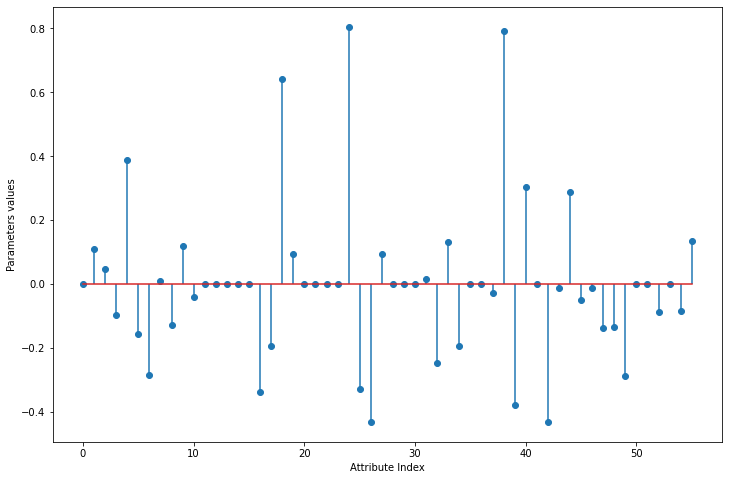

In [32]:
plt.figure(figsize=(12,8))
plt.stem(coef)
plt.xlabel('Attribute Index')
plt.ylabel('Parameters values')
# plt.xticks(np.arange(len(coef)), poly_attributes)

In [33]:
print('The most informative attribute is:', poly_attributes[np.argmax(abs(coef))])

The most informative attribute is: ['Fashion accessories + Cash']


In [34]:
# Problem 5
X_train = train_prepared_df[['Gender', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Morning', 'Afternoon', 'Evening', 'Night']].to_numpy()
X_train = X_train[np.where(train_prepared_df['Branch C']==1)]
t_train = train_prepared_df['Customer type'].to_numpy()
t_train = t_train[np.where(train_prepared_df['Branch C']==1)]

X_test = test_prepared_df[['Gender', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Morning', 'Afternoon', 'Evening', 'Night']].to_numpy()
X_test = X_test[np.where(test_prepared_df['Branch C']==1)]
t_test = test_prepared_df['Customer type'].to_numpy()
t_test = t_test[np.where(test_prepared_df['Branch C']==1)]

pipeline = joblib.load('Model/pipeline_problem5.pkl')

X_train.shape, t_train.shape, X_test.shape, t_test.shape

((270, 12), (270,), (58, 12), (58,))

In [35]:
y_train = pipeline.predict(X_train)
print(classification_report(t_train, y_train))
print(confusion_matrix(t_train, y_train))

              precision    recall  f1-score   support

         0.0       0.68      0.63      0.65       137
         1.0       0.65      0.70      0.67       133

    accuracy                           0.66       270
   macro avg       0.66      0.66      0.66       270
weighted avg       0.66      0.66      0.66       270

[[86 51]
 [40 93]]


In [36]:
y_test = pipeline.predict(X_test)
print(classification_report(t_test, y_test))
print(confusion_matrix(t_test, y_test))

              precision    recall  f1-score   support

         0.0       0.40      0.31      0.35        32
         1.0       0.33      0.42      0.37        26

    accuracy                           0.36        58
   macro avg       0.37      0.37      0.36        58
weighted avg       0.37      0.36      0.36        58

[[10 22]
 [15 11]]


In [37]:
coef = pipeline.named_steps['log_reg'].coef_
coef = coef.reshape(79,1)

In [38]:
poly_attributes = ['Intercept']
N_attributes = pipeline.named_steps['poly_feature'].powers_.shape[0]
attrib_names = np.array(['Gender', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Morning', 'Afternoon', 'Evening', 'Night'])

for i in range(1,N_attributes):
    temp = attrib_names[pipeline.named_steps['poly_feature'].powers_[i,:]==1]
    
    if len(temp)==1:
        poly_attributes += [temp[0]]
    else:
        poly_attributes += [temp[0]+' + '+temp[1]]
        
poly_attributes = np.array(poly_attributes).reshape(-1,1)

poly_attributes.shape

(79, 1)

In [39]:
pd.DataFrame(np.hstack((poly_attributes,coef)), columns=['Attributes', 'Coefficients'])

,Attributes,Coefficients
0,Intercept,-9.456744250230026e-05
1,Gender,0.18531731597749848
2,Monday,0.12023982722947879
3,Tuesday,-0.14602727014013447
4,Wednesday,0.20529023045527556
...,...,...
74,Morning + Evening,0.0
75,Morning + Night,0.0
76,Afternoon + Evening,0.0
77,Afternoon + Night,0.0


In [40]:
useless_feature = poly_attributes[np.where(coef==0)]
useless_feature

array(['Monday + Tuesday', 'Monday + Wednesday', 'Monday + Thursday',
       'Monday + Friday', 'Monday + Saturday', 'Monday + Sunday',
       'Tuesday + Wednesday', 'Tuesday + Thursday', 'Tuesday + Friday',
       'Tuesday + Saturday', 'Tuesday + Sunday', 'Wednesday + Thursday',
       'Wednesday + Friday', 'Wednesday + Saturday', 'Wednesday + Sunday',
       'Thursday + Friday', 'Thursday + Saturday', 'Thursday + Sunday',
       'Friday + Saturday', 'Friday + Sunday', 'Saturday + Sunday',
       'Morning + Afternoon', 'Morning + Evening', 'Morning + Night',
       'Afternoon + Evening', 'Afternoon + Night', 'Evening + Night'],
      dtype='<U21')

Text(0, 0.5, 'Parameters values')

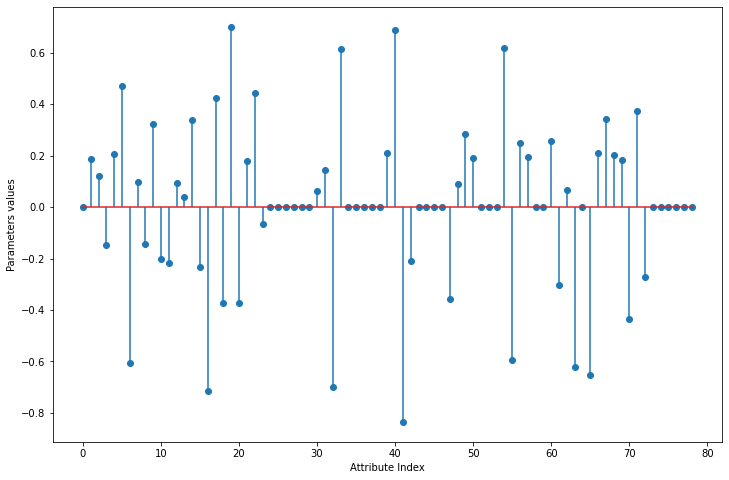

In [41]:
plt.figure(figsize=(12,8))
plt.stem(coef)
plt.xlabel('Attribute Index')
plt.ylabel('Parameters values')
# plt.xticks(np.arange(len(coef)), poly_attributes)

In [42]:
print('The most informative attribute is:', poly_attributes[np.argmax(abs(coef))])

The most informative attribute is: ['Tuesday + Evening']


In [43]:
# Problem 6
tree = joblib.load('Model/tree_problem6.pkl')
random_forest = joblib.load('Model/random_forest_problem6.pkl')
log_reg = joblib.load('Model/log_reg_problem6.pkl')

X_train = pd.read_csv('Problem 6 data/X_train.csv').to_numpy()
X_test = pd.read_csv('Problem 6 data/X_test.csv').to_numpy()
t_train = pd.read_csv('Problem 6 data/t_train.csv').to_numpy().ravel()
t_test = pd.read_csv('Problem 6 data/t_test.csv').to_numpy().ravel()

X_train.shape, t_train.shape

((800, 27), (800,))

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

## Define the function to do the evaluate
def classifier_evaluator(estimator, X_train, t_train, X_test, t_test, model_name=None, confidence=0.95):

    train_scores = cross_val_score(estimator, 
                                   X_train, t_train,
                                   cv=10,
                                   scoring='accuracy')
   
    train_accuracy = accuracy_score(t_train, estimator.predict(X_train))
    
    train_ci = stats.t.interval(confidence, len(train_scores)-1,
                                loc=train_scores.mean(),
                                scale=train_scores.std(ddof=1)/np.sqrt(len(train_scores)))
                              
    test_scores = cross_val_score(estimator, 
                                  X_test, t_test,
                                  cv=10,
                                  scoring='accuracy')
   
    test_accuracy = accuracy_score(t_test, estimator.predict(X_test))
    
    test_ci = stats.t.interval(confidence, len(test_scores)-1,
                               loc=test_scores.mean(),
                               scale=test_scores.std(ddof=1)/np.sqrt(len(test_scores)))
                               
    if model_name:
        print(model_name,'\n---------------------------------')
    print('Accuracy Train: ', train_accuracy)
    print(confidence*100,'% CI Train = ', train_ci)
    
    print('Accuracy Test: ', test_accuracy)
    print(confidence*100,'% CI Test = ', test_ci)
    print('---------------------------------')
    print('Confusion matrix for training:\n' , confusion_matrix(t_train, estimator.predict(X_train)))
    print('Confusion matrix for test:\n' , confusion_matrix(t_test, estimator.predict(X_test)))

In [45]:
y_test = log_reg.predict(X_test)
y_test.shape

(200,)

In [46]:
## For Logestic Regression Classifier
classifier_evaluator(log_reg, X_train, t_train, X_test, t_test, model_name='Logistic Regression')

Logistic Regression 
---------------------------------
Accuracy Train:  0.23625
95.0 % CI Train =  (0.13588177967077045, 0.15661822032922953)
Accuracy Test:  0.115
95.0 % CI Test =  (0.05497049262821761, 0.19502950737178237)
---------------------------------
Confusion matrix for training:
 [[19 21 12 10 13 19  6]
 [ 8 37 21 14 17 20  9]
 [16 15 35  7  7 22 12]
 [10 23 15 16  8 28 11]
 [14 27 16  5 20 18 11]
 [ 8 29 20  8 13 38 15]
 [12 13 16  8 12 22 24]]
Confusion matrix for test:
 [[1 4 4 2 3 9 2]
 [4 5 3 1 5 7 7]
 [4 5 5 4 5 4 2]
 [1 5 3 3 5 6 4]
 [3 4 6 2 2 8 3]
 [2 8 3 3 4 6 7]
 [3 6 4 2 4 6 1]]


In [47]:
## For Decision Tree
classifier_evaluator(tree, X_train, t_train, X_test, t_test, model_name='Tree')

Tree 
---------------------------------
Accuracy Train:  0.4175
95.0 % CI Train =  (0.1504539956640422, 0.2020460043359578)
Accuracy Test:  0.15
95.0 % CI Test =  (0.06213528511777025, 0.19786471488222976)
---------------------------------
Confusion matrix for training:
 [[52 13 12  4  2  8  9]
 [15 66 13  9  2 12  9]
 [15 24 57  3  3  5  7]
 [12 17 16 41  2 14  9]
 [14 11 19 14 31  6 16]
 [15 18 21 10  9 44 14]
 [14 14 15 12  3  6 43]]
Confusion matrix for test:
 [[ 6  3  2  3  2  6  3]
 [ 8  8  8  1  0  4  3]
 [ 6  6  6  2  0  4  5]
 [ 8  3  3  4  2  1  6]
 [ 5  7  6  3  1  3  3]
 [ 4 10  6  4  1  2  6]
 [ 5  6  6  3  3  0  3]]


In [48]:
## For Random Forest
classifier_evaluator(random_forest, X_train, t_train, X_test, t_test, model_name='Random Forest')

Random Forest 
---------------------------------
Accuracy Train:  1.0
95.0 % CI Train =  (0.1196160773511857, 0.15538392264881432)
Accuracy Test:  0.14
95.0 % CI Test =  (0.05943142001492465, 0.13056857998507534)
---------------------------------
Confusion matrix for training:
 [[100   0   0   0   0   0   0]
 [  0 126   0   0   0   0   0]
 [  0   0 114   0   0   0   0]
 [  0   0   0 111   0   0   0]
 [  0   0   0   0 111   0   0]
 [  0   0   0   0   0 131   0]
 [  0   0   0   0   0   0 107]]
Confusion matrix for test:
 [[3 4 4 3 3 6 2]
 [3 5 9 4 6 4 1]
 [3 4 6 3 4 4 5]
 [5 8 4 3 0 2 5]
 [6 4 7 1 3 5 2]
 [5 6 6 4 4 5 3]
 [2 5 6 4 4 2 3]]
